In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures



# Libraries for plotting:
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [59]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(file_path, header=0)
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [60]:
# First, let's only use numeric data:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [61]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], axis= 1, inplace= True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [62]:
# Functions for Plotting

def Dist_Plot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel("Price (in dollars)")
    plt.ylabel("Proportion of Cars")

    plt.show()
    plt.close()

In [63]:
def PollyPlot(xtrain, xtest, ytrain, ytest, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, ytrain, 'ro', label='Training Data')   
    plt.plot(xtest, ytest, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(
        x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [64]:
y_data = df["price"]

# Drop price data in dataframe x_data:
x_data = df.drop("price", axis = 1)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("Number of Test sample:", x_test.shape[0])
print("Number of Training samples:", x_train.shape[0])

Number of Test sample: 21
Number of Training samples: 180


#### Question #1):
Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following: "x_train1" , "x_test1", "y_train1" and "y_test1".

In [66]:
#x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=0)
#print("Number of Test sample:", x_test.shape[0])
#print("Number of Training samples:", x_test.shape[1])

In [67]:
# We create a Linear Regression object:
lr = LinearRegression()

In [68]:
#We fit the model using the feature "horsepower":

lr.fit(x_train[["horsepower"]], y_train)

LinearRegression()

In [69]:
lr.score(x_test[["horsepower"]], y_test)

0.3635875575078824

In [70]:
lr.score(x_train[["horsepower"]], y_train)

0.6619724197515103

#### Question #2): 
Find the R^2 on the test data using 40% of the dataset for testing.

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.40, random_state=0)


lr.score(x_test[["horsepower"]], y_test)

0.7565592251392638

In [72]:
lr.score(x_train[["horsepower"]], y_train)

0.5589207284321129

### Cross-Validation Score

In [73]:
Rcross = cross_val_score(lr, x_data[['horsepower']], y_data, cv=4)

In [74]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [75]:
print("The mean of the folds are", Rcross.mean(),
      "and the standard deviation is", Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.2911839444756029


In [76]:
-1 * cross_val_score(lr, x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

#### Question #3): 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [77]:
Rcross2 = cross_val_score(lr, x_data[[ "horsepower"]], y_data, cv = 2)
Rcross2

array([0.59015621, 0.44319613])

In [78]:
Rcross2.mean()

0.5166761697127429

In [79]:
yhat = cross_val_predict(lr, x_data[["horsepower"]], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Part 2: Overfitting, Underfitting and Model Selection¶
It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [80]:
lre = LinearRegression()
data = ['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']

lre.fit(x_train[data], y_train)

LinearRegression()

In [81]:
# Prediction using training data:
yhat_train = lre.predict(x_train[data])
yhat_train[0:5]

array([38237.3225152 ,  8757.67570728, 16832.43125207, 16093.28264058,
       14757.89820098])

In [82]:
yhat_test = lre.predict(x_test[data])
yhat_test[0:5]

array([ 5114.7345989 , 10941.98915173, 20956.19697977, 20968.65125706,
       19966.75504097])

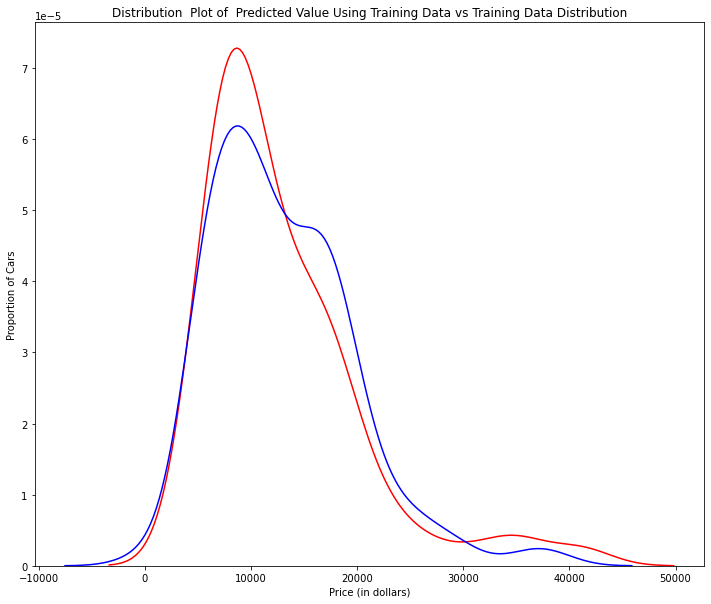

In [83]:
# Let's examine the distribution of the predicted values of the training data.
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
Dist_Plot(y_train, yhat_train, "Actual Values (Train)",
                 "Predicted Values (Train)", Title)

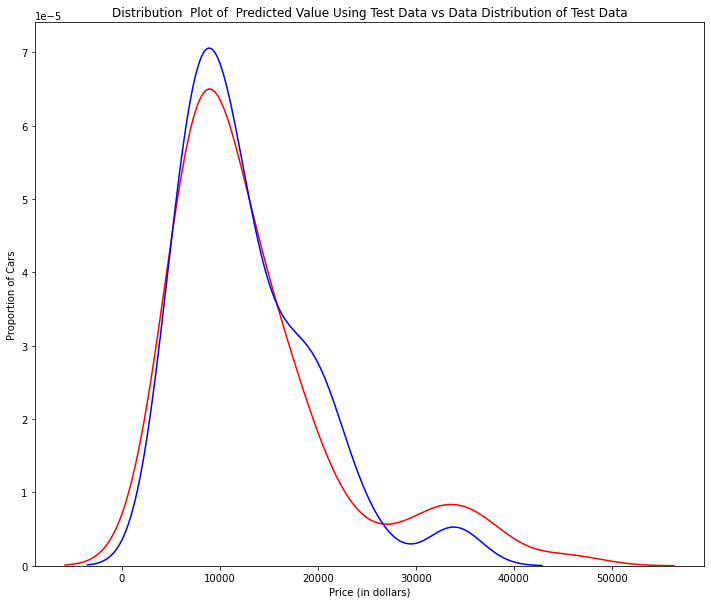

In [84]:
Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
Dist_Plot(y_test, yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

#### Overfitting¶
Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.
Let's use 55 percent of the data for training and the rest for testing:

--> Used cars Pricing 2